In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)


In [19]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


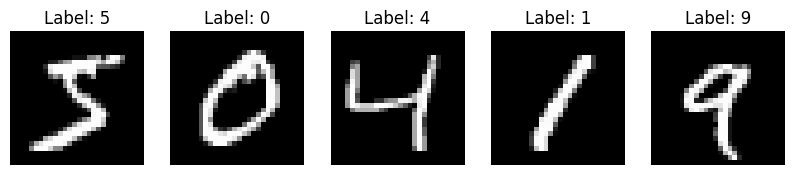

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

In [21]:
# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)

# Apply PCA using scikit-learn
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat_scaled)
X_test_pca = pca.transform(X_test_flat_scaled)

In [22]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by each component:\n", explained_variance_ratio)
print("Cumulative explained variance ratio:\n", np.cumsum(explained_variance_ratio))

Explained variance ratio by each component:
 [0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089924 0.01028649 0.00994486 0.00936383 0.00921045
 0.00893436 0.00869912 0.00827363 0.00803415 0.00764841 0.00741769
 0.00715271 0.00691843 0.00684117 0.00656665 0.00631605 0.00612836
 0.00596218 0.00587628 0.00571416 0.00562111 0.00554417 0.0053812
 0.00530226 0.00519287 0.00507905 0.00479234 0.00475977 0.00466912
 0.00451102 0.00448401 0.00443261 0.0043942  0.00435777 0.00425937
 0.00423094 0.00416225]
Cumulative explained variance ratio:
 [0.05646717 0.09724989 0.13464369 0.16349484 0.18870593 0.21064863
 0.22988207 0.24734006 0.26269099 0.27670818 0.29012561 0.30216303
 0.31330873 0.32420796 0.33449445 0.34443932 0.35380315 0.3630136
 0.37194796 0.38064708 0.38892071 0.39695486 0.40460327 0.41202096
 0.41917367 0.42609209 0.43293326 0.43949991 0.44581596 0.45194433
 0.45790651 0.46378279 0.

In [23]:
def custom_pca(X, n_components):
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Compute covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]

    # Select the top n_components
    eigenvectors_subset = sorted_eigenvectors[:, :n_components]

    # Transform the data
    X_reduced = np.dot(X_centered, eigenvectors_subset)

    return X_reduced, sorted_eigenvalues[:n_components]

In [24]:
X_train_pca_custom, custom_explained_variance = custom_pca(X_train_flat_scaled, n_components=50)
print("Custom PCA explained variance:\n", custom_explained_variance)

Custom PCA explained variance:
 [40.48763511 29.24169752 26.81180449 20.68661822 18.07665012 15.73317787
 13.79060909 12.51758909 11.00679527 10.05049705  9.62045779  8.63097356
  7.99159687  7.81488215  7.37553786  7.13058751  6.71398002  6.60400749
  6.40604846  6.23737743  5.93229172  5.76059855  5.48403364  5.31859721
  5.12873534  4.96062446  4.90533662  4.70843497  4.5291976   4.39470849
  4.27522172  4.21399693  4.09838079  4.03181137  3.97713624  3.86052409
  3.80864021  3.72563426  3.64393543  3.4416973   3.41624517  3.36378527
  3.25773631  3.23620323  3.204781    3.17911021  3.14205728  3.08588859
  3.06076556  3.03759974]


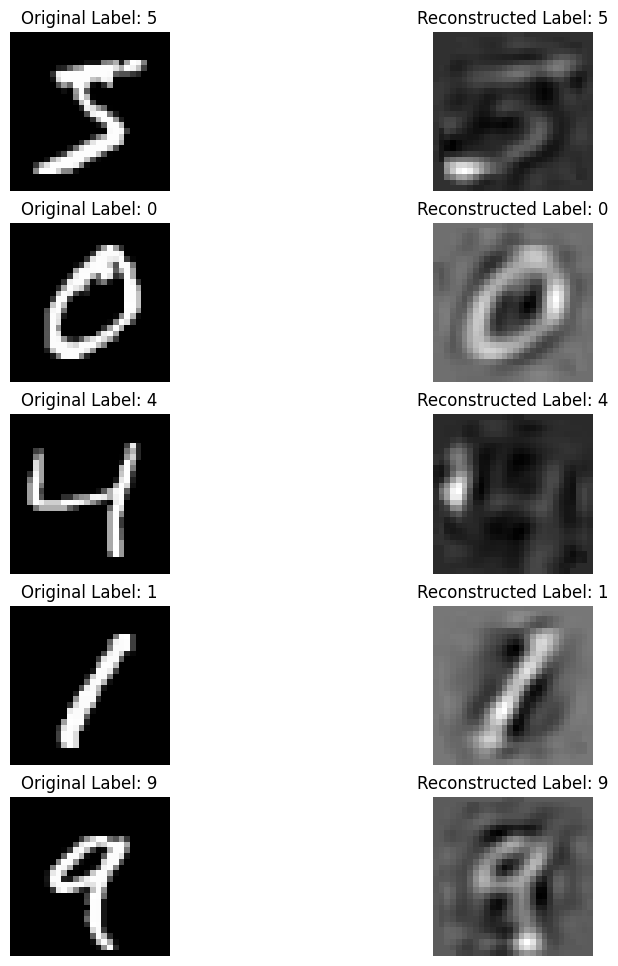

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(10, 12))
for i in range(5):
    # Original image
    axes[i, 0].imshow(X_train[i], cmap='gray')
    axes[i, 0].set_title(f"Original Label: {y_train[i]}")
    axes[i, 0].axis('off')

    # Reconstructed image from PCA components
    X_reconstructed = np.dot(X_train_pca[i], pca.components_) + pca.mean_
    X_reconstructed_image = X_reconstructed.reshape(28, 28)
    axes[i, 1].imshow(X_reconstructed_image, cmap='gray')
    axes[i, 1].set_title(f"Reconstructed Label: {y_train[i]}")
    axes[i, 1].axis('off')
plt.show()